# pycen
Lightweight Python package for exploring and acquiring U.S. Census data with intuitive spatial integration.

In [1]:
import pycen
from pycen import explore, acquire

## 3. Acquire (tabular census data)
- `acquire.get_census()` -- census data only (tabular)
    - <mark>this notebook</mark>
- `acquire.get_boundaries()` -- boundary files (spatial)
    - see `4_acquire_spatial-advanced.ipynb` for details
- `acquire.get_censhp()` -- **both at once** (GeoDataframe) 
    - see `2_acquire_spatial.ipynb` for details
---
`acquire.get_census()` shares the same core API as `get_censhp`, so many examples and parameter explanations from `2_acquire_spaital.ipynb` apply directly. However, `get_census` returns tabular data only (no geometry), so spatial-only features are not available: **no clipping via place/cbsa/csa/zcta**, no `quick_viz` maps, and no geometry‑based joins or boundary operations. For those, use get_censhp and refer to the spatial tutorials.

### 3.1 single-year, single-city, multi-geography

Resolving geography...
  State: California (CA, FIPS: 06)
  County: Alameda County (FIPS: 001)

Fetching data...
  Product: acs5 (2023)
  Geography: County
  Variables: 9


Downloading: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


Done!


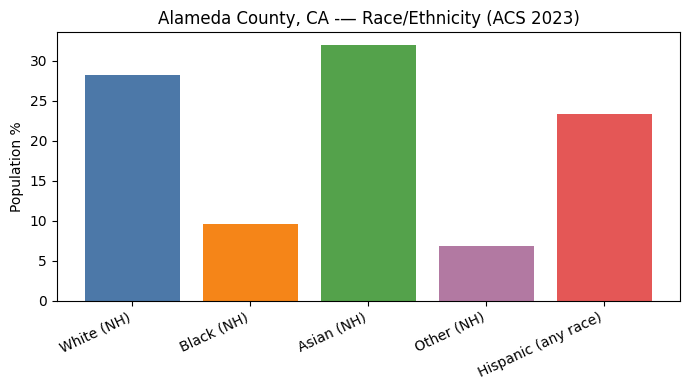

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pycen import acquire

vars_race = {
    'B03002_001E': 'total',
    'B03002_003E': 'nh_white',
    'B03002_004E': 'nh_black',
    'B03002_006E': 'nh_asian',
    'B03002_005E': 'nh_aian',
    'B03002_007E': 'nh_nhpi',
    'B03002_008E': 'nh_other',
    'B03002_009E': 'nh_two_or_more',
    'B03002_012E': 'hispanic',
}

df_race = acquire.get_census(
    variables=vars_race,
    geography='county',
    state='CA',
    county='Alameda',
    dataset='acs5',
    year=2023,
)

row = df_race.iloc[0]
other = row['nh_aian'] + row['nh_nhpi'] + row['nh_other'] + row['nh_two_or_more']
vals = {
    'White (NH)': row['nh_white'],
    'Black (NH)': row['nh_black'],
    'Asian (NH)': row['nh_asian'],
    'Other (NH)': other,
    'Hispanic (any race)': row['hispanic'],
}

pct = {k: v / row['total'] * 100 for k, v in vals.items()}

plt.figure(figsize=(7, 4))
plt.bar(pct.keys(), pct.values(), color=['#4c78a8', '#f58518', '#54a24b', '#b279a2', '#e45756'])
plt.ylabel('Population %')
plt.title('Alameda County, CA -— Race/Ethnicity (ACS 2023)')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

### 3.2 multi-year, single-geography, multi-variable


--- Year 2019 ---
Resolving geography...
  State: California (CA, FIPS: 06)
  County: Alameda County (FIPS: 001)

Fetching data...
  Product: acs5 (2019)
  Geography: County
  Variables: 4


Downloading: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Done!

--- Year 2020 ---
Resolving geography...
  State: California (CA, FIPS: 06)
  County: Alameda County (FIPS: 001)

Fetching data...
  Product: acs5 (2020)
  Geography: County
  Variables: 4


Downloading: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]


Done!

--- Year 2021 ---
Resolving geography...
  State: California (CA, FIPS: 06)
  County: Alameda County (FIPS: 001)

Fetching data...
  Product: acs5 (2021)
  Geography: County
  Variables: 4


Downloading: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Done!


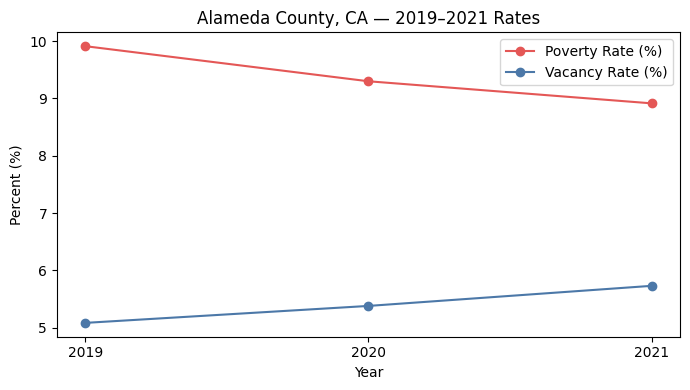

In [3]:
# 2019–2021 line comparative trends
import matplotlib.pyplot as plt
from pycen import acquire

vars_trend = {
    'B17001_001E': 'poverty_total',
    'B17001_002E': 'poverty_below',
    'B25002_001E': 'housing_total',
    'B25002_003E': 'housing_vacant',
}

df_trend = acquire.get_census(
    variables=vars_trend,
    geography='county',
    county='Alameda',
    state='CA',
    dataset='acs5',
    years=[2019, 2020, 2021],
    merge='long',
)

tr = df_trend.sort_values('year')
tr['poverty_pct'] = tr['poverty_below'] / tr['poverty_total'] * 100
tr['vacancy_pct'] = tr['housing_vacant'] / tr['housing_total'] * 100

plt.figure(figsize=(7, 4))
plt.plot(tr['year'], tr['poverty_pct'], marker='o', color='#e45756', label='Poverty Rate (%)')
plt.plot(tr['year'], tr['vacancy_pct'], marker='o', color='#4c78a8', label='Vacancy Rate (%)')
plt.title('Alameda County, CA — 2019–2021 Rates')
plt.xlabel('Year')
plt.xticks(sorted(tr['year'].unique()))
plt.ylabel('Percent (%)')
plt.legend()
plt.tight_layout()
plt.show()

### 3.3 multi-year, multi-geography

In [4]:
explore.lookup('B08006_017E', dataset='acs5',year=2021)


Variable: B08006_017E
Label: Estimate!!Total:!!Worked from home
Concept: SEX OF WORKERS BY MEANS OF TRANSPORTATION TO WORK
Type: int
Group: B08006
Year: 2021
Dataset: ACS5



--- Year 2019 ---
Resolving geography...
  State: California (CA, FIPS: 06)

Fetching data...
  Product: acs5 (2019)
  Geography: County
  Variables: 2


Downloading: 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


Done!

--- Year 2020 ---
Resolving geography...
  State: California (CA, FIPS: 06)

Fetching data...
  Product: acs5 (2020)
  Geography: County
  Variables: 2


Downloading: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


Done!

--- Year 2021 ---
Resolving geography...
  State: California (CA, FIPS: 06)

Fetching data...
  Product: acs5 (2021)
  Geography: County
  Variables: 2


Downloading: 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


Done!

--- Year 2022 ---
Resolving geography...
  State: California (CA, FIPS: 06)

Fetching data...
  Product: acs5 (2022)
  Geography: County
  Variables: 2


Downloading: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Done!

--- Year 2023 ---
Resolving geography...
  State: California (CA, FIPS: 06)

Fetching data...
  Product: acs5 (2023)
  Geography: County
  Variables: 2


Downloading: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Done!


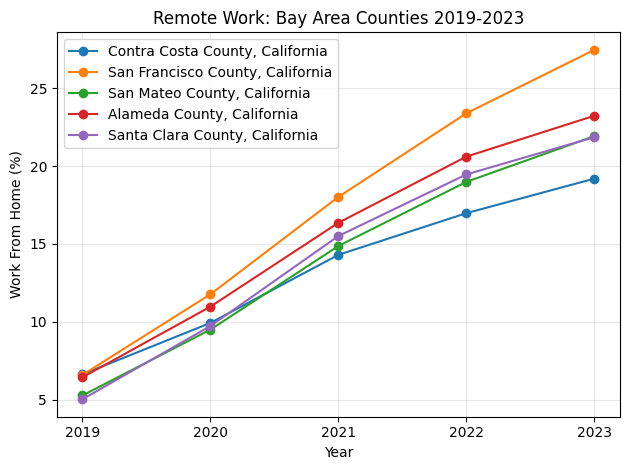

In [5]:
# track remote work surge: 2019-2023                                                                         
# B08101_049E = worked from home                                                                             
                                                                                                               
df_long = acquire.get_census(                                                                                
    variables={'B08006_017E': 'wfh_workers', 'B08101_001E': 'total_workers'},                                
    geography='county',                                                                                      
    state='CA',                                                                                              
    years=[2019, 2020, 2021, 2022, 2023],                                                                    
    merge='long'                                                                                             
)                                                                                                            
                                                                                                               
# calc WFH percentage                                                                                   
df_long['wfh_pct'] = (df_long['wfh_workers'] / df_long['total_workers']) * 100                               
                                                                                                               
# focus on major counties                                                                                    
major = df_long[df_long['NAME'].str.contains('San Francisco|Alameda|Santa Clara|Contra Costa|San Mateo')]                           
                                                                                                               
# plot                                                                                                       
import matplotlib.pyplot as plt                                                                              
for county in major['NAME'].unique():                                                                        
    county_data = major[major['NAME'] == county]                                                             
    plt.plot(county_data['year'], county_data['wfh_pct'], marker='o', label=county)                          
                                                                                                               
plt.title('Remote Work: Bay Area Counties 2019-2023')                                                  
plt.ylabel('Work From Home (%)')                                                                             
plt.xlabel('Year')             
plt.xticks(sorted(major['year'].unique()))                                                                              
plt.legend()                                                                                                 
plt.grid(alpha=0.3)                                                                                          
plt.tight_layout()